  #### The Spaceship Titanic challenge on Kaggle is a competition in which the task is to predict which passengers are transported to an alternate dimension, based on a set of variables.

 Importing libraries

In [5]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

In [6]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

## EDA

In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
print("Shape of train dataset : ",train.shape)
print("Shape of test dataset : ",test.shape)

Shape of train dataset :  (8693, 14)
Shape of test dataset :  (4277, 13)


In [6]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
#analysing Transported column
train['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

<Axes: xlabel='Transported', ylabel='count'>

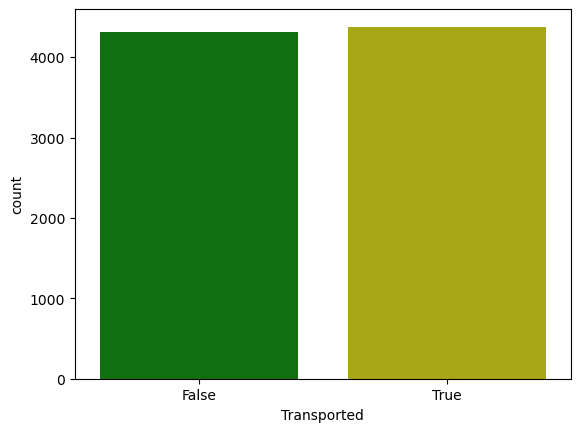

In [9]:
#countplot
sns.countplot(x='Transported',data=train,palette=['g','y'])

<Axes: xlabel='VIP', ylabel='count'>

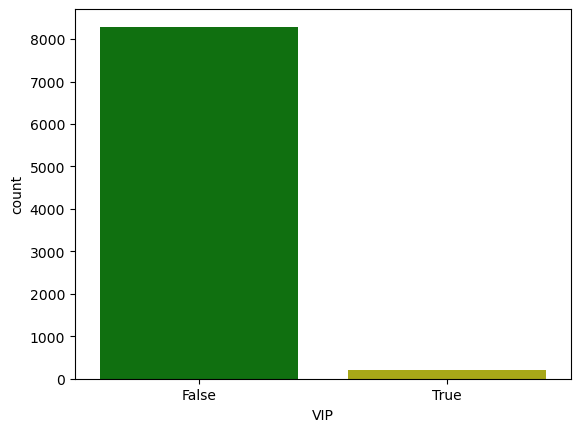

In [10]:
#analysing VIP column
sns.countplot(x='VIP',data=train,palette=['g','y'])

In [11]:
#create new feature
train['Not Transported']=1-train['Transported']

<Axes: xlabel='VIP'>

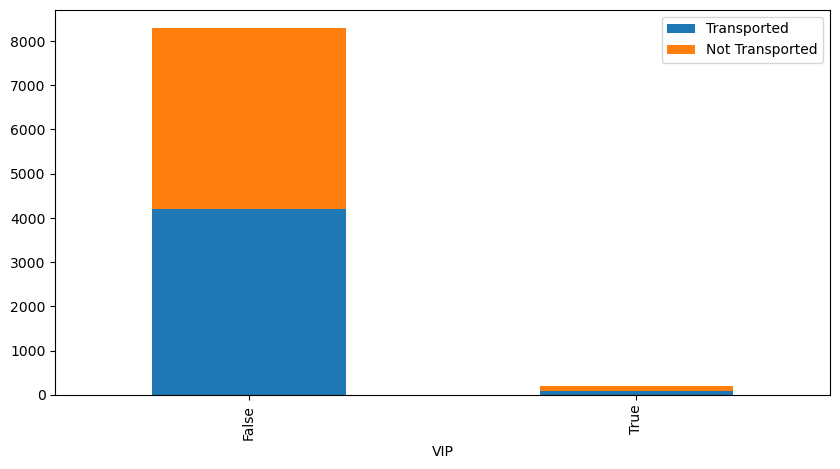

In [12]:
#visulazing transported based VIP column
train.groupby('VIP').agg('sum')[['Transported','Not Transported']].plot(kind='bar',figsize=(10,5),stacked=True)

## Data Cleaning

In [13]:
#checking the no of null values in the dataset
train.isnull().sum().sort_values(ascending=False)

CryoSleep          217
ShoppingMall       208
VIP                203
HomePlanet         201
Name               200
Cabin              199
VRDeck             188
FoodCourt          183
Spa                183
Destination        182
RoomService        181
Age                179
PassengerId          0
Transported          0
Not Transported      0
dtype: int64

In [7]:
#filling null values with mean in numerical columns

train['Age']=train['Age'].fillna(train['Age'].mean())
train['RoomService']=train['RoomService'].fillna(train['RoomService'].mean())
train['FoodCourt']=train['FoodCourt'].fillna(train['FoodCourt'].mean())
train['ShoppingMall']=train['ShoppingMall'].fillna(train['ShoppingMall'].mean())
train['Spa']=train['Spa'].fillna(train['Spa'].mean())
train['VRDeck']=train['VRDeck'].fillna(train['VRDeck'].mean())

In [8]:
#filling null values with mode in categorical columns

train['HomePlanet']=train['HomePlanet'].fillna(train['HomePlanet'].mode()[0])
train['CryoSleep']=train['CryoSleep'].fillna(train['CryoSleep'].mode()[0])
train['Destination']=train['Destination'].fillna(train['Destination'].mode()[0])
train['VIP']=train['VIP'].fillna(train['VIP'].mode()[0])
train['Cabin']=train['Cabin'].fillna(train['Cabin'].mode()[0])

In [9]:
train.isnull().sum().sort_values(ascending=False)

Name            200
PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

## Feature Engineering

In [10]:
#count unique values in cabin column
train.Cabin.value_counts()

G/734/S     207
C/21/P        7
B/201/P       7
G/1368/P      7
E/13/S        7
           ... 
G/556/P       1
E/231/S       1
G/545/S       1
G/543/S       1
F/947/P       1
Name: Cabin, Length: 6560, dtype: int64

In [ ]:
train['Cabin_side'] = train['Cabin'].apply(lambda x: x.split('/')[2])
train['Cabin_side'].unique()

P - cabin side Port ;
S - cabin side Starboard

In [ ]:
df1=train
df1.head()

In [ ]:
#converting categorical feature into numerical feature
df1.HomePlanet=df1.HomePlanet.map({'Europa':0,'Earth':1,'Mars':2})
df1.Cabin_side=df1.Cabin_side.map({'P':0,'S':1})

In [ ]:
df1.Destination=df1.Destination.map({'TRAPPIST-1e':0,'PSO J318.5-22':1,'55 Cancri e':2})

In [ ]:
df1["CryoSleep"].replace(False,0,inplace=True)
df1["CryoSleep"].replace(True,1,inplace=True)
df1["VIP"].replace(False,0,inplace=True)
df1["VIP"].replace(True,1,inplace=True)
df1["Transported"].replace(False,0,inplace=True)
df1["Transported"].replace(True,1,inplace=True)

In [ ]:
#droping unwanted columns
df1=train.drop(['Name','Cabin','Not Transported'],axis=1)

In [ ]:
#final_df
df1.head()

In [ ]:
df1.describe()

In [ ]:
#correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(),annot=True,linewidth=0.4,cmap='Greens_r')

In [ ]:
#checking null values
df1.isnull().sum()

## Model Building

#### Splitting data

In [ ]:
X=df1.drop(['Transported'],axis=1)
y=df1['Transported']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print(f'X_train',X_train.shape)
print(f'y_train',y_train.shape)
print(f'X_val',X_val.shape)
print(f'y_val',y_val.shape)

## 1. K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#to find which value shows the lowest werror
error = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    error.append(np.mean(pred_i != y_val))

In [ ]:
plt.plot(range(1,30),error,color='green',linestyle='--',marker='o',markersize=10,markerfacecolor='g')

From this graph, K value of 3 seem to show the lowest mean error.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

#### Prediction and Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

pred1 = knn.predict(X_val)
a1=accuracy_score(y_val,pred1)
print("Accuracy KNN Classifier : ",round(accuracy_score(y_val,pred1),4)*100, '%')

## 2. AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adbc=AdaBoostClassifier(n_estimators=115,learning_rate=0.412,random_state=42)
adbc.fit(X_train,y_train)

#### Prediction and Accuracy

In [ ]:
pred2=adbc.predict(X_val)
a2=accuracy_score(y_val,pred2)
print("Accuracy AdaBoost Classifier : ",round(accuracy_score(y_val,pred2),4)*100, '%')

## 3. Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

#### Prediction and Accuracy

In [ ]:
pred3=gnb.predict(X_val)
a3=accuracy_score(y_val,pred3)
print("Accuracy Gaussian Naive Bayes : ",round(accuracy_score(y_val,pred3),4)*100, '%')

## 4. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,y_train)

#### Prediction and Accuracy

In [ ]:
pred4=dtc.predict(X_val)
a4=accuracy_score(y_val,pred4)
print("Accuracy Decision Tree Classifier : ",round(accuracy_score(y_val,pred4),4)*100, '%')

## 5. Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnnb= MultinomialNB()
mnnb.fit(X_train,y_train)

#### Prediction and Accuracy

In [ ]:
pred5=mnnb.predict(X_val)
a5=accuracy_score(y_val,pred5)
print("Accuracy Multinomial Naive Bayes : ",round(accuracy_score(y_val,pred5),4)*100, '%')

## 6. Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

#### Prediction and Accuracy

In [ ]:
pred6 =svc.predict(X_val)
a6=accuracy_score(y_val,pred6)
print("Accuracy Support Vector Classifier : ",round(accuracy_score(y_val,pred6),1)*100, '%')

## 7. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

#### Prediction and Accuracy

In [ ]:
pred7=rfc.predict(X_val)
a7=accuracy_score(y_val,pred7)
print("Accuracy Random Forest Classifier : ",round(accuracy_score(y_val,pred7),2)*100, '%')

## 8. Multi-layer Perceptron classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier()
mlp.fit(X_train, y_train)

#### Prediction and Accuracy

In [ ]:
pred8=mlp.predict(X_val)
a8=accuracy_score(y_val,pred8)
print("Accuracy Multi-layer Perceptron classifier : ",round(accuracy_score(y_val,pred8),2)*100, '%')

## 9. Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

#### Prediction and Accuracy

In [ ]:
pred9=gbc.predict(X_val)
a9=accuracy_score(y_val,pred9)
print("Accuracy Gradient Boosting : ",round(accuracy_score(y_val,pred9),2)*100, '%')

## 10. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression()
lg.fit(X_train,y_train)

#### Prediction and Accuracy

In [ ]:
pred10=gbc.predict(X_val)
a10=accuracy_score(y_val,pred10)
print("Accuracy Logistic Regression : ",round(accuracy_score(y_val,pred10),2)*100, '%')


## Model  Comparison

In [ ]:
models=['K Nearest Neighbor','AdaBoost Classifier','Gaussian Naive Bayes','Decision Tree Classifier','Multinomial Naive Bayes',
        'Support Vector Classifier','Random Forest Classifier','Multi-layer Perceptron classifier','Gradient Boosting','Logistic Regression']
acc=[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10]
data={'Models':['K Nearest Neighbor','AdaBoost Classifier','Gaussian Naive Bayes','Decision Tree Classifier','Multinomial Naive Bayes',
                'Support Vector Classifier','Random Forest Classifier','Multi-layer Perceptron classifier','Gradient Boosting','Logistic Regression'],
      'Accuracy':[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10]}
pd.DataFrame(data).style.background_gradient(cmap='Blues')

## Visualizing Accuracy of 10 Models 

In [ ]:
#plotting
plt.title('Comparing Models')
plt.xlabel('Accuracy')
sns.barplot(x=acc,y=models,width=1,palette='rainbow')

## Submission

#### Test Data Exploration

In [ ]:
test.head()

In [ ]:
print("Shape of test dataset : ",test.shape)

In [ ]:
#checking the no of null values in the dataset
test.isnull().sum().sort_values(ascending=False)

In [ ]:
#filling null values with mean in numerical columns

test['Age']=test['Age'].fillna(test['Age'].mean())
test['RoomService']=test['RoomService'].fillna(test['RoomService'].mean())
test['FoodCourt']=test['FoodCourt'].fillna(test['FoodCourt'].mean())
test['ShoppingMall']=test['ShoppingMall'].fillna(test['ShoppingMall'].mean())
test['Spa']=test['Spa'].fillna(test['Spa'].mean())
test['VRDeck']=test['VRDeck'].fillna(test['VRDeck'].mean())

In [ ]:
#filling null values with mode in categorical columns

test['HomePlanet']=test['HomePlanet'].fillna(test['HomePlanet'].mode()[0])
test['CryoSleep']=test['CryoSleep'].fillna(test['CryoSleep'].mode()[0])
test['Destination']=test['Destination'].fillna(test['Destination'].mode()[0])
test['VIP']=test['VIP'].fillna(test['VIP'].mode()[0])
test['Cabin']=test['Cabin'].fillna(test['Cabin'].mode()[0])

In [ ]:
test['Cabin_side'] = test['Cabin'].apply(lambda x: x.split('/')[2])
test['Cabin_side'].unique()

In [ ]:
#converting categorical feature into numerical feature
test.HomePlanet=test.HomePlanet.map({'Europa':0,'Earth':1,'Mars':2})
test.Cabin_side=test.Cabin_side.map({'P':0,'S':1})

In [ ]:
test.Destination=test.Destination.map({'TRAPPIST-1e':0,'PSO J318.5-22':1,'55 Cancri e':2})

In [ ]:
test["CryoSleep"].replace(False,0,inplace=True)
test["CryoSleep"].replace(True,1,inplace=True)
test["VIP"].replace(False,0,inplace=True)
test["VIP"].replace(True,1,inplace=True)

In [ ]:
#droping unwanted columns
test_df=test.drop(['Name','Cabin'],axis=1)

In [ ]:
#final_df
test_df.head()

In [ ]:
#checking null values
test_df.isnull().sum()

In [ ]:
#Hyperparameter tuning in Gradient Boosting Classifier

gbcc=GradientBoostingClassifier(n_estimators=210,learning_rate=0.01,random_state=42,max_depth=10,subsample=0.7)
gbcc.fit(X_train,y_train)


In [ ]:
pred=gbcc.predict(X_val)
acc=accuracy_score(y_val,pred)
print("Accuracy  : ",round(accuracy_score(y_val,pred),5)*100, '%')

In [ ]:
#final prediction
pred_final=gbcc.predict(test_df)

In [ ]:
a=test_df['PassengerId']
x=pd.DataFrame(a)
b=pred_final
y=pd.DataFrame(b)

In [ ]:
final=pd.concat([x,y],axis=1)
final.replace(0,False,inplace=True)
final.replace(1,True,inplace=True)
final.rename(columns={0:'Transported'},inplace=True)
final

In [ ]:
final.to_csv('spaceship_titanic.csv',index=False)

In [ ]:
#visualizing predicted values
sns.countplot(x='Transported',data=final,palette=['r','g'])